#TRABAJO PRACTICO - APRENDIZAJE NO SUPERVISADO

#### Integrandes del grupo 26

*  Emilio Morbidoni	emiliomorbidoni@gmail.com
*  Fernando Zarzosa	zarzosa.fernando@gmail.com
*  Daniel Gonzalez	daniel.jor.gonzalez@gmail.com

Importamos librerias

In [135]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn import preprocessing
from sklearn.cluster import KMeans,MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

import scipy.cluster.hierarchy as sch


In [136]:
import warnings; 
warnings.simplefilter('ignore')

In [137]:
if sns.__version__ == '0.10.1':
    !pip install seaborn==0.11.0

## CARGAR EL DATASET

In [138]:
# from google.colab import files
# _file = files.upload()


In [139]:
#df_original = pd.read_csv(io.BytesIO(_file['players_20.csv']))

df_original = pd.read_csv('https://raw.githubusercontent.com/djgonzalezflores/DiploDatos2020/master/AprendizajeNoSupervisado/players_20.csv')

In [140]:
df_original.sample(5)

sofifa_id                                         player_url  ...   rcb    rb
13599     211667  https://sofifa.com/player/211667/patryk-stepin...  ...  57+2  60+2
37        188350  https://sofifa.com/player/188350/marco-reus/20...  ...  55+3  64+3
4951      233785  https://sofifa.com/player/233785/robin-bormuth...  ...  68+2  60+2
2064      203888  https://sofifa.com/player/203888/eric-fernando...  ...  74+2  61+2
4359      198856  https://sofifa.com/player/198856/christopher-a...  ...  70+2  65+2

[5 rows x 104 columns]

In [141]:
df_original.shape

(18278, 104)

##Exploración del DATASET

In [142]:
# lista de columnas en el data set
list(df_original.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [143]:
# Cantidad de columnas en el dataset origianl
_cant_col = list(df_original.columns)
print(f"Cantidad de columnas: {len(_cant_col)}")

Cantidad de columnas: 104


*Seleccionamos las columnas que no son relevantes para el analisis*


In [144]:
_col_no_importantes = ['sofifa_id', 'player_url', 'dob', 'real_face', 'player_tags', 'team_jersey_number', 'work_rate','body_type',
                       'loaned_from', 'joined','contract_valid_until', 'nation_position', 'nation_jersey_number', 
                       'international_reputation','weak_foot','skill_moves',
                       'player_traits','ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
                       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb',
                       'age','height_cm','weight_kg']                

In [145]:
_col_skilss = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [146]:
_col_gk_skils = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [147]:
#Normalizo las posiciones de los jugadores segun el valor del campo team_position
Mediocampo=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
Delantero=  ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW'] 
Defensor=['RCB','CB','LCB','LB','RB','RWB','LWB']
Arquero=['GK']


In [148]:
# remuevo las colummnas no importantes
df = df_original.drop(df_original[_col_no_importantes] ,axis=1)

In [149]:
# data set solo de registros que sean arqueros.
# se usa los que tengan posición GK (goalkeeper)
df_gk = df_original[df_original.team_position == 'GK']

In [150]:
df_gk.sample(3)

sofifa_id                                         player_url  ...  rcb   rb
8437      182451  https://sofifa.com/player/182451/yuelei-cheng/...  ...  NaN  NaN
11827     135646  https://sofifa.com/player/135646/laurent-walth...  ...  NaN  NaN
12395     239816  https://sofifa.com/player/239816/nico-mantl/20...  ...  NaN  NaN

[3 rows x 104 columns]

### Limitar la cantidad de registros a los jugadores que tengan un promedio general ('Overall') mayor a X %


In [151]:
_overall = 70
df_filtardo = df.loc[df.overall >= _overall]

In [152]:
# cantidad de registros unicos de nacionalidad
print(f"Cantidad de paises : {len(df_filtardo.nationality.unique())}")

Cantidad de paises : 125


In [153]:
#cantidad de registros por nacionalidad
cant_reg = df_filtardo.groupby(by=['nationality'],)['short_name'].count().sort_values(ascending=False)
cant_reg

nationality
Brazil                 499
Spain                  495
Argentina              446
France                 357
Germany                321
                      ... 
Chad                     1
Philippines              1
Kenya                    1
Estonia                  1
São Tomé & Príncipe      1
Name: short_name, Length: 125, dtype: int64

La cantidad de jugadores (con overall >= 70%) por paices esta desbalanceado

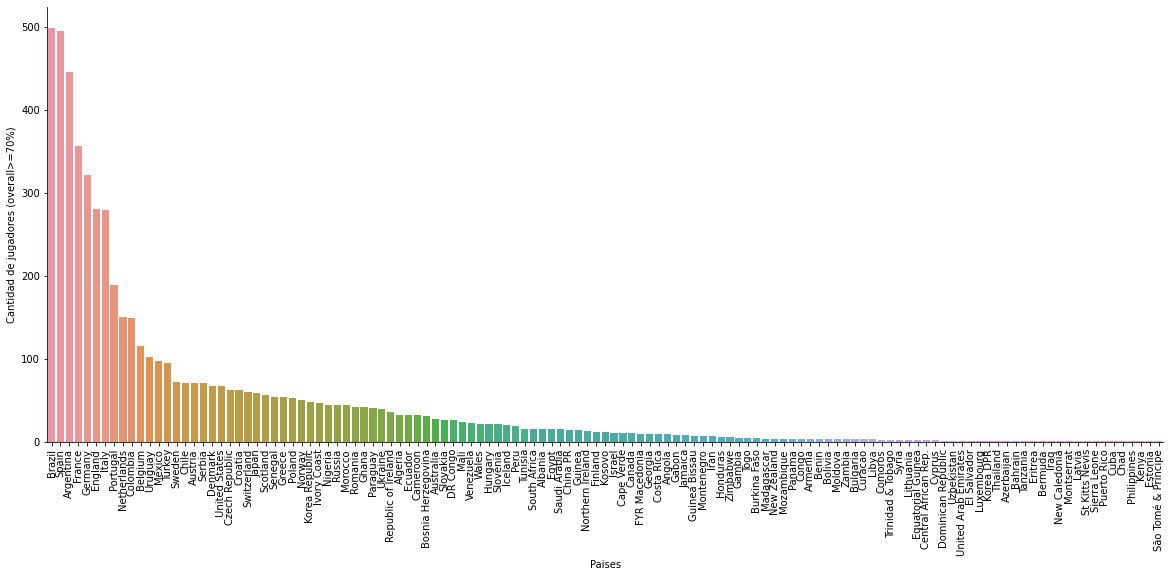

In [154]:
plt.figure(figsize=(20,8))
sns.barplot(x=cant_reg.index,y=cant_reg.values)
sns.despine()
plt.xticks(rotation=90)
plt.title = 'Cantidad de jugadores por pais'
plt.xlabel('Paises')
plt.ylabel(f'Cantidad de jugadores (overall>={_overall}%)')
plt.show()

### Limpieza de datos y escalado de columna de valor/salario

In [155]:
#guardo los valores de columnas descriptivas para un analisis posterior
df_nombres_club = df_filtardo.loc[:,['short_name','long_name','club', 'nationality']]

In [156]:
df_filtardo.drop(['short_name','long_name','club', 'nationality'],axis=1,inplace=True)

In [157]:
df_filtardo.sample(4)

overall  potential  ...  goalkeeping_positioning  goalkeeping_reflexes
4526       71         71  ...                        6                    12
1492       76         76  ...                       16                     8
961        78         78  ...                       12                     8
4125       71         78  ...                       10                     7

[4 rows x 54 columns]

Las posiciones de un jugador pueden ser múltiples y estan separadas por ","

In [158]:
# Dividi la columna playerpositions en tres columnas, puede ser útil, aunque none figuraría como categoría

df_filtardo[['player_position_1','player_position_2', 'player_position_3']] = df_filtardo.player_positions.str.split(" ",expand=True,)
df_filtardo['player_position_1'] = df_filtardo['player_position_1'].str.replace(',', '')
df_filtardo['player_position_2'] = df_filtardo['player_position_2'].str.replace(',', '')
df_filtardo.sample(4)

# si tomamos dummy de esto, tendríamos 44 en vez de los 15*14*15 que creaba con el que tenía las tres alternativas

overall  potential  ...  player_position_2  player_position_3
3869       72         72  ...               None               None
3508       72         76  ...                 RW               None
4845       70         79  ...                 RB                 LB
1653       75         83  ...                 LB                 RM

[4 rows x 57 columns]

In [159]:
df_filtardo['value_wage']=df_filtardo['value_eur']/df_filtardo['wage_eur'] # outlier, 19500 ratio

Los montos de salario y valor del jugador son numero muy grandes. Se pueden dividir por 1millon para escalarlos


In [160]:
df_filtardo[['value_eur','wage_eur', 'value_wage']].head(5)

value_eur  wage_eur  value_wage
0   95500000    565000  169.026549
1   58500000    405000  144.444444
2  105500000    290000  363.793103
3   77500000    125000  620.000000
4   90000000    470000  191.489362

*Existen atributos categoricos que son interesantes de tener en el agrupamiento como "preferred_foot"*

### Transformación de datos


*Existen muchos campos con valor NAN 
Se reemplazan por el valor 0 para numericos y N/A para objects(str)*

In [161]:
for c in df_filtardo.columns:
    # print(c, df_filtardo[c].dtype)
    if df_filtardo[c].dtype == int or df_filtardo[c].dtype == float:
        df_filtardo[c].fillna(0,inplace=True)
    if df_filtardo[c].dtype == object:
        df_filtardo[c].fillna('N/A',inplace=True)
df_filtardo.head(5)

overall  potential  ...  player_position_3  value_wage
0       94         94  ...                 ST  169.026549
1       93         93  ...                N/A  144.444444
2       92         92  ...                N/A  363.793103
3       91         93  ...                N/A  620.000000
4       91         91  ...                N/A  191.489362

[5 rows x 58 columns]

In [162]:
#verifico
df_filtardo[['pace','shooting','passing','dribbling','defending', 'team_position']].sample(5)

pace  shooting  passing  dribbling  defending team_position
3238  90.0      60.0     60.0       73.0       68.0            RB
3105  71.0      62.0     70.0       71.0       68.0           SUB
2025  62.0      43.0     58.0       60.0       75.0           RCB
2590  81.0      65.0     72.0       76.0       54.0            RM
450   70.0      67.0     79.0       76.0       78.0            LB

In [163]:
# reduzco el valor numerico de los salarios y valuacion del jugador
df_filtardo['value_eur_mill'] = df_filtardo['value_eur'].apply(lambda x: x/1000000)
df_filtardo['wage_eur_mill'] = df_filtardo['wage_eur'].apply(lambda x: x/1000000)
df_filtardo['release_clause_eur_mill'] = df_filtardo['release_clause_eur'].apply(lambda x: x/1000000)


Pie preferido y posición en el equipo del jugador se puede codificar para que sea valor numerico


In [164]:
le = preprocessing.LabelEncoder()
le.fit(df_filtardo.preferred_foot)

# Ver el resultado
dict(zip(le.classes_,le.transform(le.classes_)+1))

le_posiciones = preprocessing.LabelEncoder()
le_posiciones.fit(df_filtardo.team_position)

# Ver el resultado
dict(zip(le_posiciones.classes_,le_posiciones.transform(le_posiciones.classes_)+1))



{'CAM': 1,
 'CB': 2,
 'CDM': 3,
 'CF': 4,
 'CM': 5,
 'GK': 6,
 'LAM': 7,
 'LB': 8,
 'LCB': 9,
 'LCM': 10,
 'LDM': 11,
 'LF': 12,
 'LM': 13,
 'LS': 14,
 'LW': 15,
 'LWB': 16,
 'N/A': 17,
 'RAM': 18,
 'RB': 19,
 'RCB': 20,
 'RCM': 21,
 'RDM': 22,
 'RES': 23,
 'RF': 24,
 'RM': 25,
 'RS': 26,
 'RW': 27,
 'RWB': 28,
 'ST': 29,
 'SUB': 30}

In [165]:
# Agregamos una columna con el valor numerico correspondiente a la codificacion de los valores de preferred_foot
df_filtardo['pie_favorito'] = le.transform(df_filtardo.preferred_foot)

In [166]:
df_filtardo.head()

overall  potential  ...  release_clause_eur_mill  pie_favorito
0       94         94  ...                    195.8             0
1       93         93  ...                     96.5             1
2       92         92  ...                    195.2             1
3       91         93  ...                    164.7             1
4       91         91  ...                    184.5             1

[5 rows x 62 columns]

In [167]:
# Organizando con funciones
def ordinal(method=preprocessing.LabelEncoder(), variable=df_filtardo.team_position, variable_1='posicion_equipo'): 
  
  method.fit(variable)

  dict(zip(method.classes_, method.transform(method.classes_)+1))

  #Agregamos una columna con el valor ordinal de la variable considerada
  df_filtardo[variable_1] = method.transform(variable)
ordinal()

# Creamos las variables correspondientes
#ordinal(variable=df_filtardo.team_position, variable_1='posicion_equipo')
ordinal(variable=df_filtardo.player_position_1, variable_1='players_position_1')
ordinal(variable=df_filtardo.player_position_2, variable_1='players_position_2')
ordinal(variable=df_filtardo.player_position_3, variable_1='players_position_3')

In [168]:
df_filtardo.head()

overall  potential  ...  players_position_2  players_position_3
0       94         94  ...                   3                  14
1       93         93  ...                   7                   9
2       92         92  ...                   0                   9
3       91         93  ...                   9                   9
4       91         91  ...                   3                   9

[5 rows x 66 columns]

In [169]:
#creo un dataframe copia para analizar las posiciones de los jugadores  
df_jugadores_posicion = df_filtardo.copy()

def posicion_consolidada(player_positions):
    if player_positions in Delantero:
        return 'Delantero'
    
    elif player_positions in Mediocampo:
        return 'Mediocampo'
    
    elif player_positions in Defensor:
        return 'Defensor'
    
    elif player_positions in Arquero:
        return 'Arquero'



df_jugadores_posicion['posicion'] = df_filtardo.team_position.apply(lambda x: posicion_consolidada(x))

In [170]:
# Borramos la columnas transformadas
df_filtardo.drop('preferred_foot',axis=1, inplace=True)
df_filtardo.drop('team_position',axis=1, inplace=True)

df_filtardo.drop('value_eur',axis=1, inplace=True)
df_filtardo.drop('wage_eur',axis=1, inplace=True)
df_filtardo.drop('release_clause_eur',axis=1, inplace=True)

In [171]:
#si no usamos player_positions lo descartamos
df_filtardo.drop('player_positions',axis=1, inplace=True)

In [172]:
df_filtardo.drop(['player_position_1', 'player_position_2', 'player_position_3'],axis=1, inplace=True)

In [173]:
df_filtardo.head(3)

overall  potential  ...  players_position_2  players_position_3
0       94         94  ...                   3                  14
1       93         93  ...                   7                   9
2       92         92  ...                   0                   9

[3 rows x 57 columns]

**Ya no existen variables categoricas en el dataset**

Todas las columnas son numericas


In [174]:
df_filtardo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 5657
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall                     5658 non-null   int64  
 1   potential                   5658 non-null   int64  
 2   pace                        5658 non-null   float64
 3   shooting                    5658 non-null   float64
 4   passing                     5658 non-null   float64
 5   dribbling                   5658 non-null   float64
 6   defending                   5658 non-null   float64
 7   physic                      5658 non-null   float64
 8   gk_diving                   5658 non-null   float64
 9   gk_handling                 5658 non-null   float64
 10  gk_kicking                  5658 non-null   float64
 11  gk_reflexes                 5658 non-null   float64
 12  gk_speed                    5658 non-null   float64
 13  gk_positioning              5658 

In [175]:
#unificamos el tipo de dato numérico
df_filtardo = df_filtardo.astype(np.float16)

In [176]:
df_filtardo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 5657
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall                     5658 non-null   float16
 1   potential                   5658 non-null   float16
 2   pace                        5658 non-null   float16
 3   shooting                    5658 non-null   float16
 4   passing                     5658 non-null   float16
 5   dribbling                   5658 non-null   float16
 6   defending                   5658 non-null   float16
 7   physic                      5658 non-null   float16
 8   gk_diving                   5658 non-null   float16
 9   gk_handling                 5658 non-null   float16
 10  gk_kicking                  5658 non-null   float16
 11  gk_reflexes                 5658 non-null   float16
 12  gk_speed                    5658 non-null   float16
 13  gk_positioning              5658 

In [177]:
df_filtardo.describe(include='all',)

overall    potential  ...  players_position_2  players_position_3
count  5658.000000  5658.000000  ...         5658.000000         5658.000000
mean           inf          inf  ...            7.328125            8.554688
std       3.824219     4.808594  ...            3.408203            2.107422
min      70.000000    70.000000  ...            0.000000            0.000000
25%      71.000000    73.000000  ...            4.000000            9.000000
50%      73.000000    76.000000  ...            9.000000            9.000000
75%      76.000000    80.000000  ...            9.000000            9.000000
max      94.000000    95.000000  ...           14.000000           14.000000

[8 rows x 57 columns]

In [178]:
df_filtardo.fillna(value=0,inplace=True)

## Visualización de datos

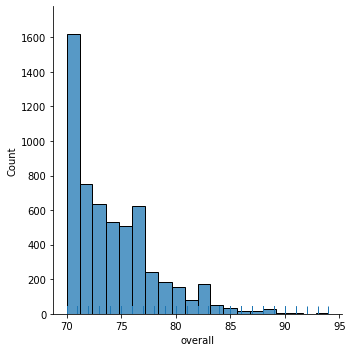

In [179]:
sns.displot(df_filtardo['overall'], bins=20,rug=True )
sns.despine()
plt.title = 'Histograma por atributo Overall'
plt.show()

In [180]:
#top 50 overall
df_top_100=df_filtardo.sort_values('overall', ascending=False).head(100)


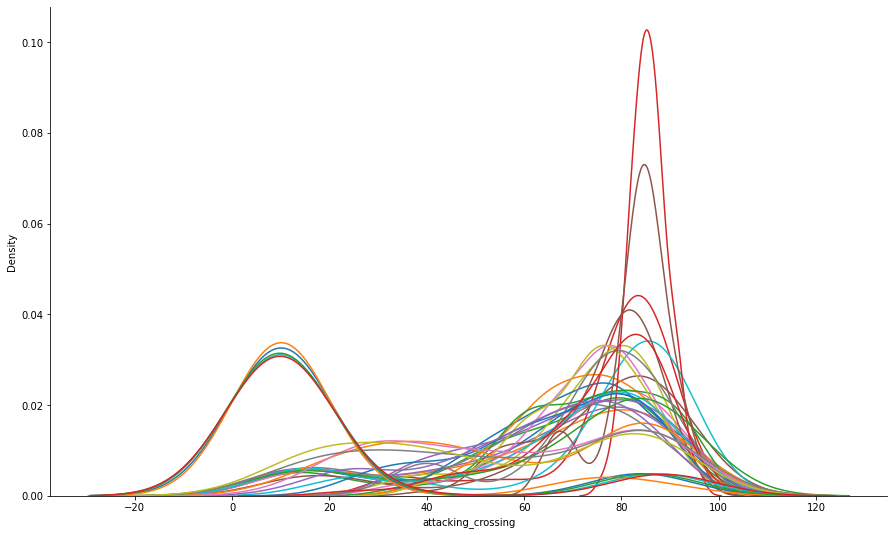

In [181]:
plt.figure(figsize=(15,9))
for col in _col_skilss:
    sns.kdeplot(data=df_top_100[col],)

sns.despine()
plt.show()

Se puede ver que el top 100 jugadores tiene atributos que supran el valor 60 y algunos atributos se agrupanen valores desde 80 a 90

Se ve un pico en el valor 15 y corresponden a todos los jugadores que no son arqueros y tienen algun atributo relacionado a esta posicióón que no es cero

<Figure size 1080x720 with 0 Axes>

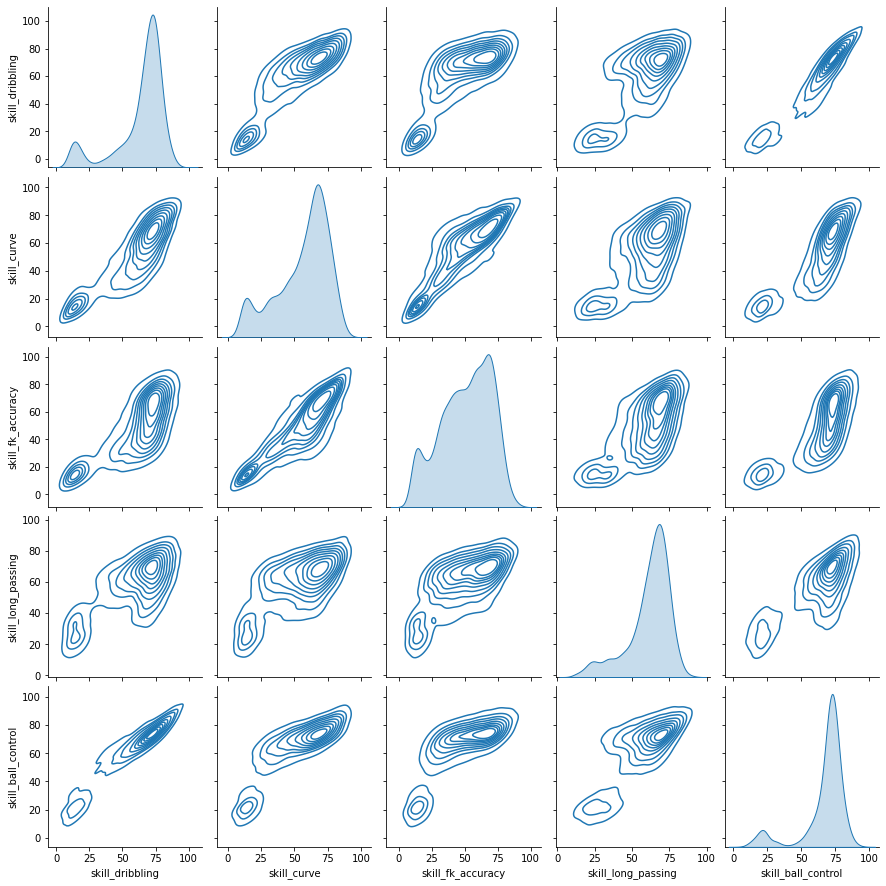

In [182]:
#lista de habilidades
habilidades = [col for col in _col_skilss if 'skill_' in col]

#Grafico las habilidades en pairplot
plt.figure(figsize=(15,10))
#con kind = kde podemos ver donde hay mas densidad de grupo de los puntos
sns.pairplot(df_filtardo[habilidades], kind='kde')
plt.title = 'Columnas de habilidad'
plt.show()

Se pueden ver para cada grupo de habilidad siempre aquellas que corresponde a los arqueros, las cuales estan bien diferenciadas

<Figure size 1080x720 with 0 Axes>

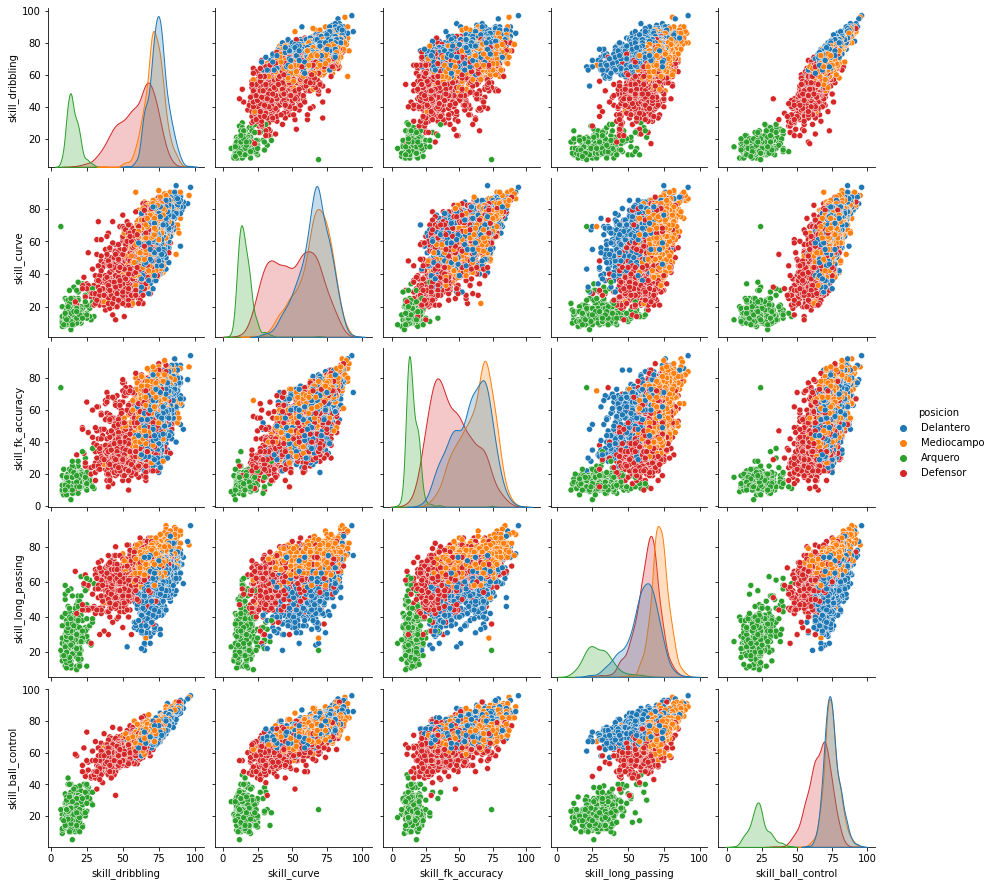

In [183]:
# utilizamos la posicion consolidada del jugador para ver como se ven los puntos 
# de las habilidades

plt.figure(figsize=(15,10))

sns.pairplot(df_jugadores_posicion[habilidades + ['posicion']], hue='posicion')
plt.title = 'Columnas de habilidad por posición'
plt.show()

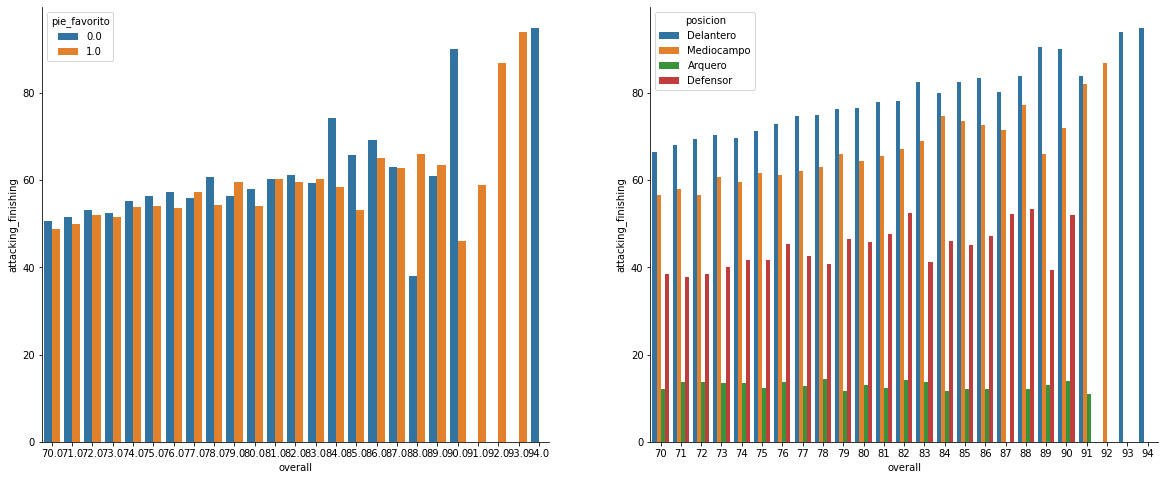

In [185]:
fig, axes = plt.subplots(1,2, figsize=(20,8),sharex=False)

sns.barplot(ax=axes[0],  x=df_filtardo.overall, y=df_filtardo.attacking_finishing, hue=df_filtardo.pie_favorito, ci=False)
sns.barplot( x=df_jugadores_posicion.overall, 
            y=df_jugadores_posicion.attacking_finishing, 
            hue=df_jugadores_posicion.posicion, ci=False)
sns.despine()
plt.show()

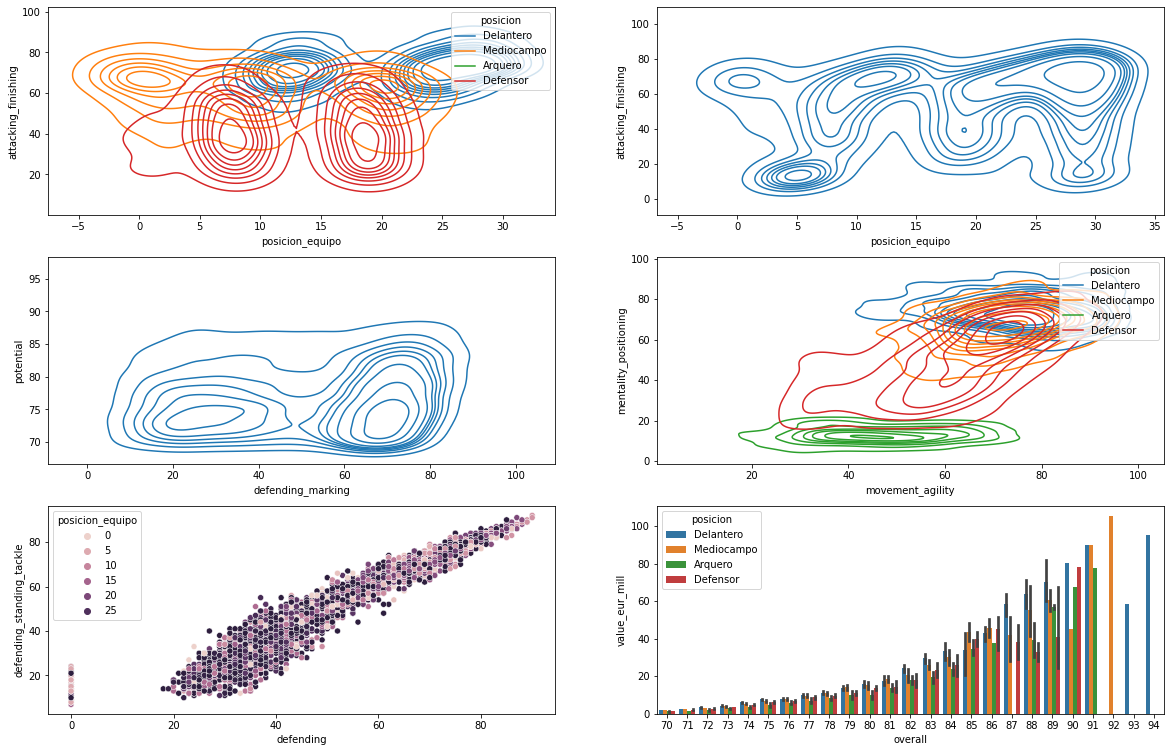

In [186]:
fig, axes = plt.subplots(3,2, figsize=(20,13),sharex=False)
sns.kdeplot(ax=axes[0,0], data=df_jugadores_posicion.posicion_equipo,data2=df_jugadores_posicion.attacking_finishing, 
            hue=df_jugadores_posicion.posicion)

sns.kdeplot(ax=axes[0,1], data=df_filtardo.posicion_equipo,data2=df_filtardo.attacking_finishing, )

sns.kdeplot(ax=axes[1,0], data=df_filtardo, x=df_filtardo.defending_marking, y=df_filtardo.potential )


sns.kdeplot(ax=axes[1,1], data=df_jugadores_posicion, x=df_jugadores_posicion.movement_agility, y=df_jugadores_posicion.mentality_positioning,
            hue=df_jugadores_posicion.posicion )


sns.scatterplot(ax=axes[2,0], x=df_filtardo.defending, y=df_filtardo.defending_standing_tackle, 
                hue=df_filtardo.posicion_equipo)

sns.barplot(ax=axes[2,1],data=df_jugadores_posicion, x=df_jugadores_posicion.overall, y=df_jugadores_posicion.value_eur_mill, 
            hue=df_jugadores_posicion.posicion)

plt.show()

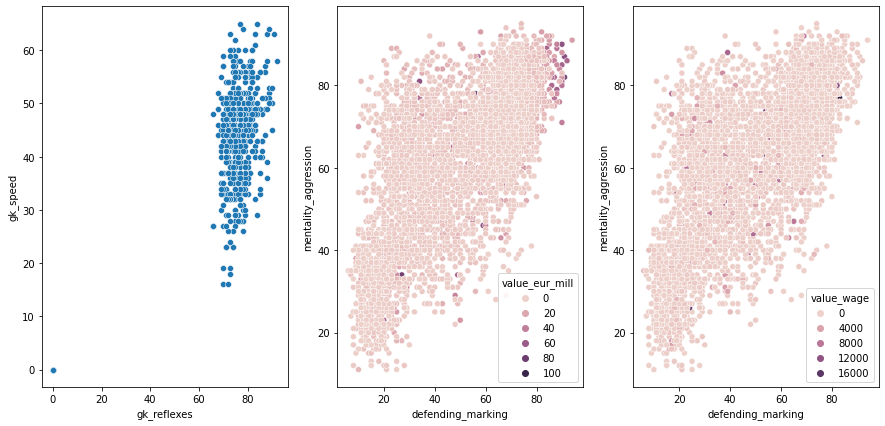

In [187]:
fig, axes = plt.subplots(1,3, figsize=(15,7))
sns.scatterplot(ax=axes[0], x=df_filtardo.gk_reflexes, y=df_filtardo.gk_speed)
sns.scatterplot(ax=axes[1],x=df_filtardo.defending_marking, y=df_filtardo.mentality_aggression, hue=df_filtardo.value_eur_mill)
sns.scatterplot(ax=axes[2],x=df_filtardo.defending_marking, y=df_filtardo.mentality_aggression, hue=df_filtardo.value_wage)
plt.show()

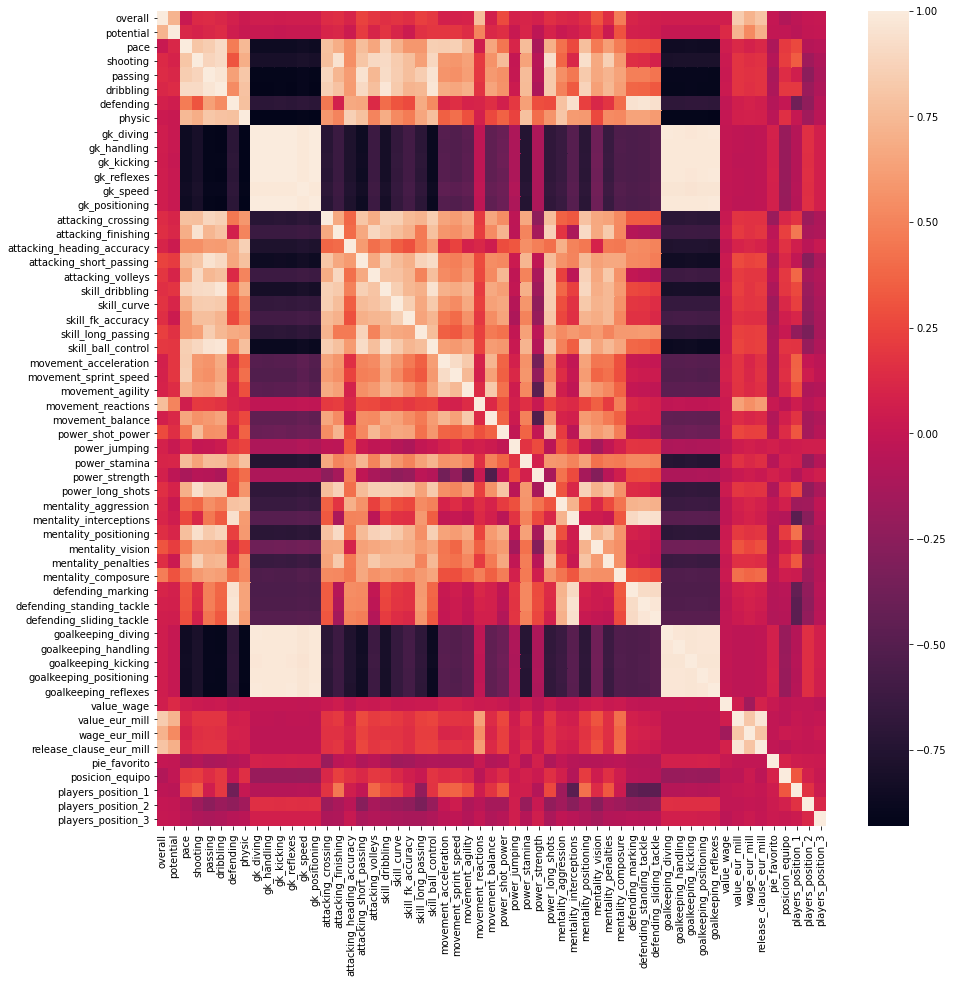

In [188]:
#matriz de correlacion
plt.figure(figsize=(15,15))
sns.heatmap(df_filtardo.corr(), annot=False,)

In [189]:
# Dropping Value_wage (because value and wage are already in)
df_filtardo.drop('value_wage',axis=1, inplace=True)

## CLUSTERING del dataset

#### normalizar datos
standarScaler [0-1] [-1 - 1]


In [190]:
df_filtardo.loc[df_filtardo.release_clause_eur_mill == np.inf, 'release_clause_eur_mill'] = 0

In [191]:
ss = StandardScaler()
nuevo_dato = ss.fit_transform(df_filtardo)


In [192]:
_n_grupo = 4

kmeans = KMeans(n_clusters=_n_grupo)

In [193]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [194]:
kmeans.fit(nuevo_dato)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [195]:
kmeans.labels_

array([3, 3, 3, ..., 3, 1, 3], dtype=int32)

In [196]:
df_filtardo['GRUPOS'] = kmeans.labels_


In [197]:
df_filtardo.sample(6)

overall  potential  pace  ...  players_position_2  players_position_3  GRUPOS
2398     74.0       74.0  68.0  ...                 9.0                 9.0       3
277      82.0       83.0  74.0  ...                 5.0                10.0       2
2330     74.0       76.0  54.0  ...                 9.0                 9.0       2
3201     73.0       73.0  84.0  ...                 9.0                 9.0       1
4688     71.0       71.0  74.0  ...                 9.0                 9.0       1
3343     72.0       81.0  64.0  ...                 9.0                 9.0       2

[6 rows x 57 columns]

In [198]:
kmeans.labels_.shape, nuevo_dato.shape # labels determines at which cluster each point belongs

((5658,), (5658, 56))

In [199]:
silhouette_avg = silhouette_score(nuevo_dato, kmeans.labels_)

In [200]:
silhouette_avg # The clusters are not that far away (1 well sided, -1 wrong sided, 0 no differences)

0.21260593044733478

#### Grafico de silueta

For n_clusters = 2 The average silhouette_score is : 0.604710505197096
For n_clusters = 3 The average silhouette_score is : 0.23296455277572395
For n_clusters = 4 The average silhouette_score is : 0.21256456797072548
For n_clusters = 5 The average silhouette_score is : 0.2178052704031235
For n_clusters = 6 The average silhouette_score is : 0.20667870568580868
For n_clusters = 7 The average silhouette_score is : 0.1807863172479979
For n_clusters = 8 The average silhouette_score is : 0.1755531552250236


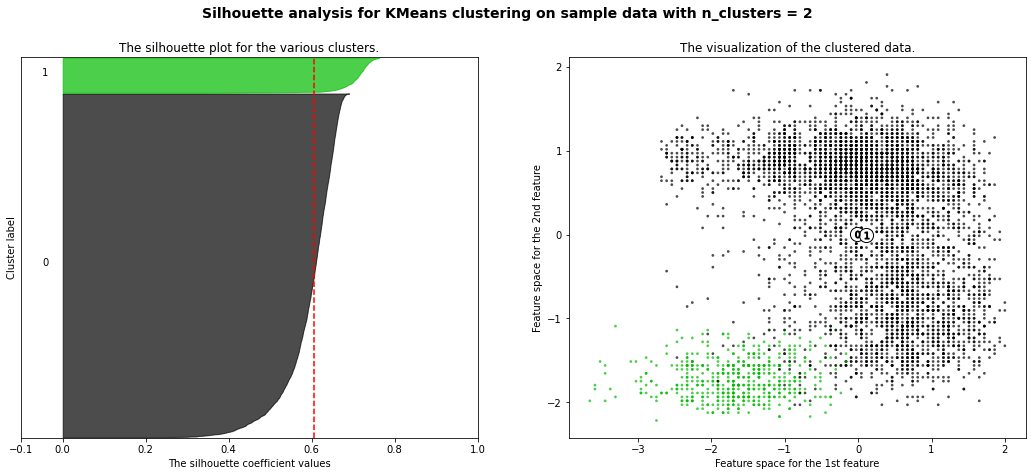

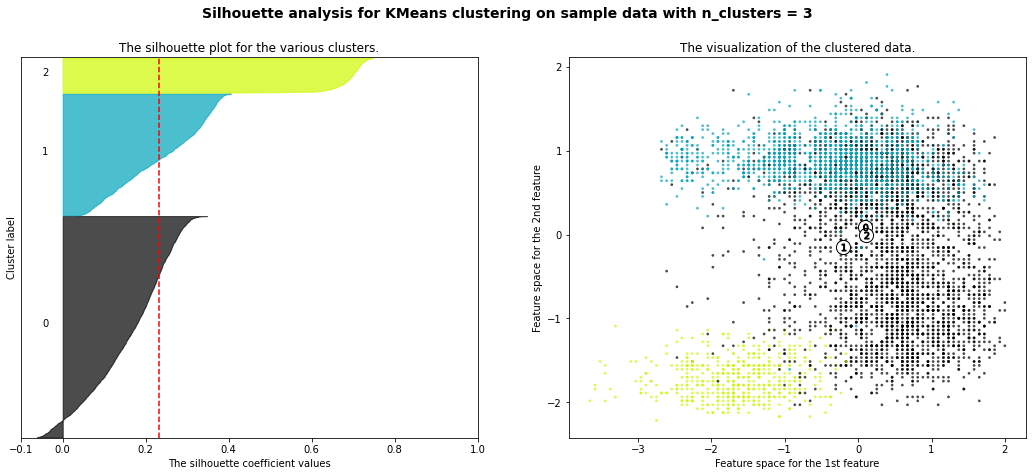

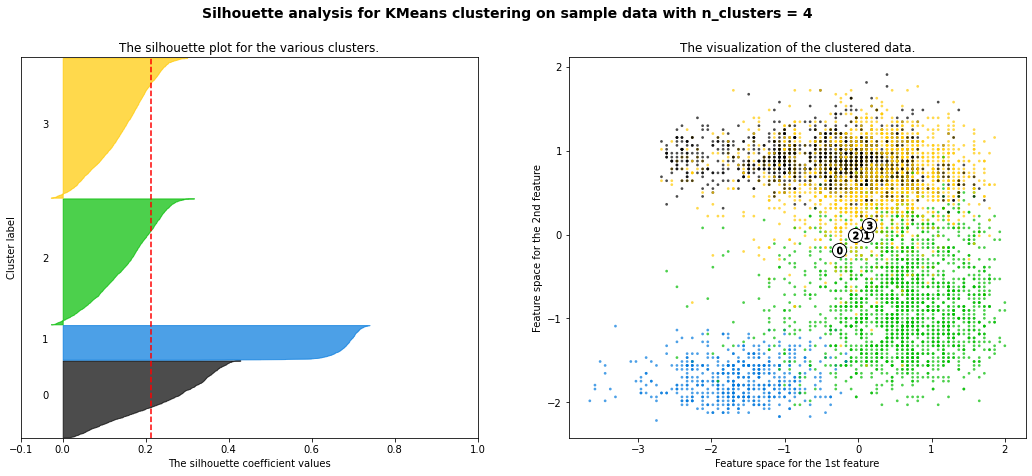

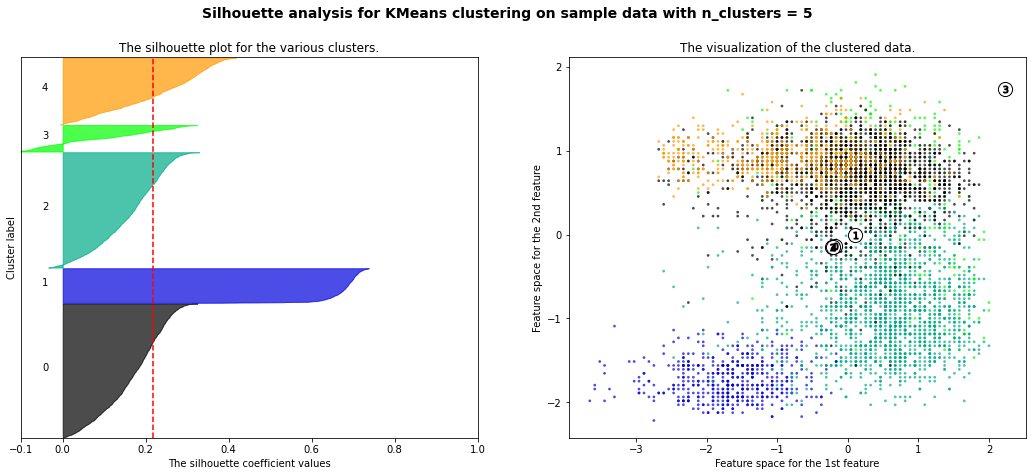

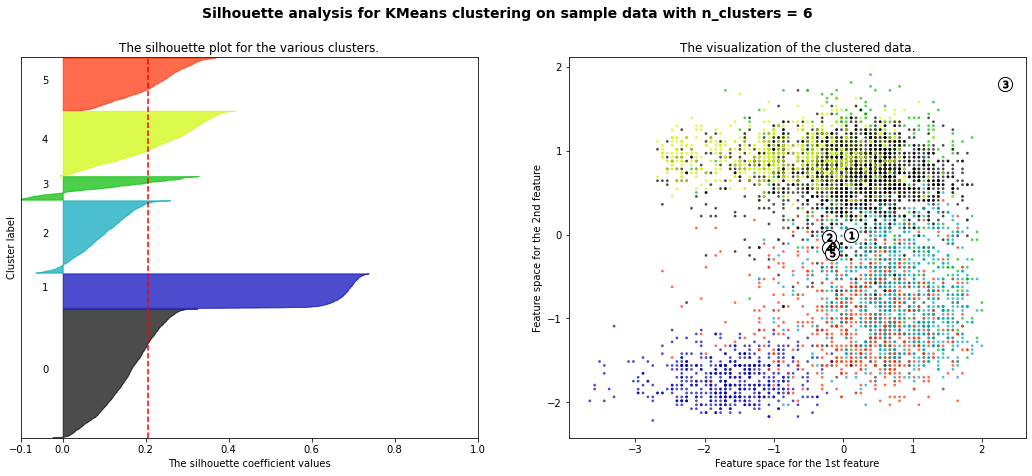

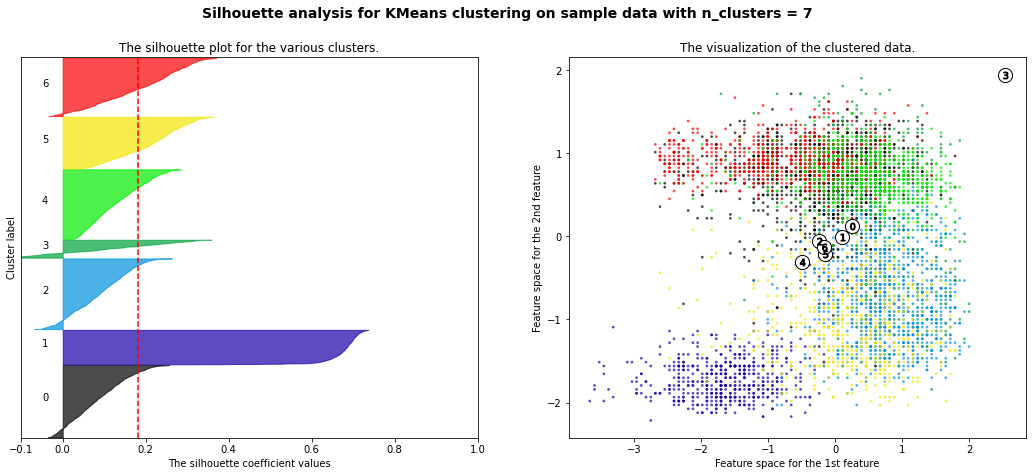

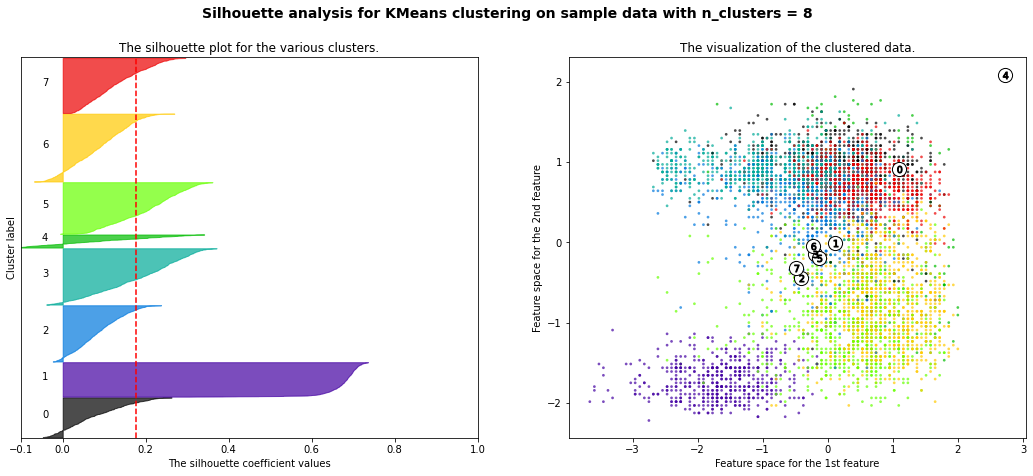

In [201]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(nuevo_dato) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(nuevo_dato)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(nuevo_dato, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(nuevo_dato, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(nuevo_dato[:,25], nuevo_dato[:, 40], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


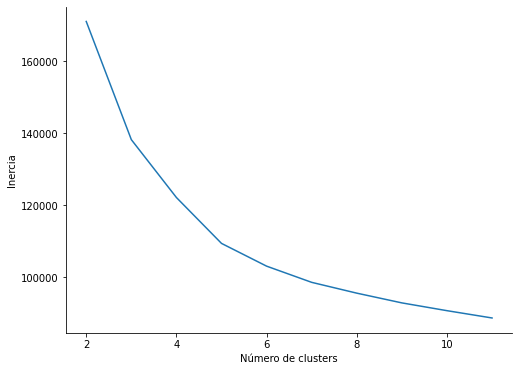

In [255]:
scores = [KMeans(n_clusters=i+2).fit(nuevo_dato).inertia_ for i in range(10)]

plt.figure(figsize=(8,6))

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número de clusters')
plt.ylabel("Inercia")

sns.despine()
plt.show()


####MeanShift

In [203]:
#mean shift
from sklearn.cluster import MeanShift

In [204]:
ms = MeanShift(n_jobs=-1).fit(nuevo_dato)

In [205]:
clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print('Grupos: ', labels_unique)
print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Grupos:  [0 1]
Numero de clusters encontrado por Mean Shift : 2


In [206]:
df_filtardo['grupos_meanshift'] = ms.labels_

In [207]:
df_filtardo[['GRUPOS','grupos_meanshift']]

GRUPOS  grupos_meanshift
0          3                 0
1          3                 0
2          3                 0
3          0                 1
4          3                 0
...      ...               ...
5653       0                 1
5654       3                 0
5655       3                 0
5656       1                 0
5657       3                 0

[5658 rows x 2 columns]

In [208]:
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
import bokeh.layouts
import bokeh.plotting
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

In [209]:
#output_file("styling_linear_mappers.html", title="styling_linear_mappers.py example")

x = np.array(df_filtardo.attacking_finishing)
y = np.array(df_filtardo.defending_marking)

c =  np.array(df_filtardo.GRUPOS)
g = np.array(df_filtardo.GRUPOS)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= np.array(df_filtardo.GRUPOS) ))

In [210]:
p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'


show(p)

In [211]:
x = np.array(df_filtardo.attacking_finishing)
y = np.array(df_filtardo.defending_marking)

c =  np.array(df_filtardo.grupos_meanshift )
g = np.array(df_filtardo.grupos_meanshift)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= np.array(df_filtardo.grupos_meanshift) ))

In [212]:


p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'
show(p)

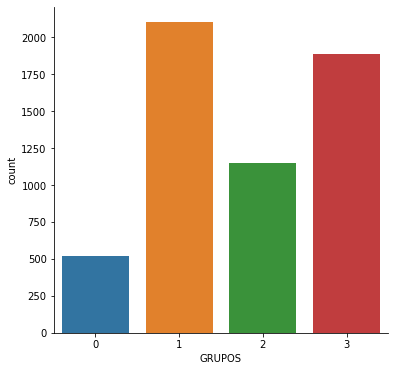

In [216]:
plt.figure(figsize=(6,6))
sns.countplot(x="GRUPOS", data=df_filtardo)
plt.title = 'Cantidad de registros por grupo'
sns.despine()
plt.show()


#### Agrupoación jerárquica

In [ ]:
df_filtardo.head()

overall  potential  pace  ...  players_position_3  GRUPOS  grupos_meanshift
0     94.0       94.0  87.0  ...                14.0       0                 0
1     93.0       93.0  90.0  ...                 9.0       0                 0
2     92.0       92.0  91.0  ...                 9.0       0                 0
3     91.0       93.0   0.0  ...                 9.0       1                 1
4     91.0       91.0  91.0  ...                 9.0       0                 0

[5 rows x 58 columns]

In [226]:
df_skills = df_filtardo.loc[:, ['overall'] + _col_skilss ]
df_skills.shape

(5658, 35)

In [227]:
#agrego los nombres a un dataframe para agregar las etiquetas
df_skills['nombre_jugador'] = df_nombres_club['short_name'].values

In [228]:
#Son muchos registros para que se vea claro el dendograma, filtramos los jugadores con mejor overall
df_skills = df_skills.loc[df_skills['overall'] > 85]

In [231]:
# solo dejo las columnas de habilidades
df_skills_norm = df_skills.loc[:,_col_skilss]

In [232]:
# uso standar scaler
X = ss.fit_transform(df_skills_norm)
X.shape

(73, 34)

In [234]:
# Matriz de distancia metodo "completo"

complete= sch.linkage(X, method='complete', metric='correlation', optimal_ordering=False)

##### Dendograma de la agrupación

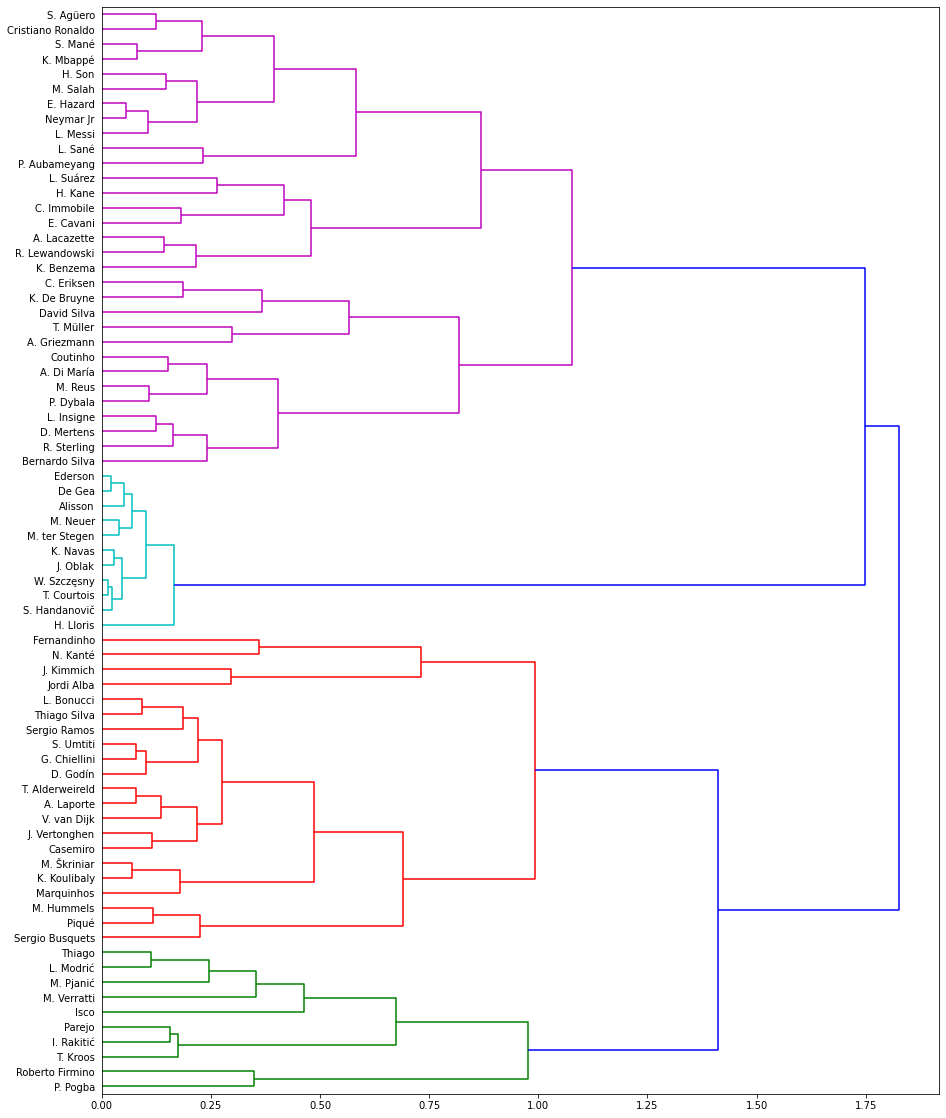

In [235]:
plt.figure(figsize=(15,20))
#dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
nom_jugadores = df_skills["nombre_jugador"].tolist()

complete_dendrogram = sch.dendrogram(complete, labels=nom_jugadores, leaf_font_size=10, orientation='right')

Si se filtran los jugadores por overall > 85, se generarn 4 grupos bien diferenciados, para los jugadores con mejor capacidad de ataque, jugadores con mejores capacidades defensivas, los arqueros y los jugadores de medio campo que tienen atributos de ataque pero tambien defensivos

## Embeddings

### Selección de características


*   Eliminar características con poca varianza (VarianceThreshold)
*   Eliminar características redundantes (mutual_info_classif)



In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Borrando columnas agregadas de los clusters previos

X = df_filtardo
#X.drop(['GRUPOS', 'grupos_meanshift'], axis=1, inplace=True)

selector = VarianceThreshold(0.90) #Elegimos un umbral del 90%. Interpretación: eliminamos las variable con mas del 90% de probabilidad de ocurrencia de un determinado valor. Ver documentación.
X =selector.fit_transform(X)
# Pregunta: Si la varianza de una variable depende de la distribución de la misma, deberíamos necesitar que todas las variables tengan la misma distribucion??


In [ ]:

df_filtardo.shape, X.shape


((5658, 58), (5658, 55))

In [ ]:
df_filtardo.head()

overall  potential  pace  ...  players_position_3  GRUPOS  grupos_meanshift
0     94.0       94.0  87.0  ...                14.0       0                 0
1     93.0       93.0  90.0  ...                 9.0       0                 0
2     92.0       92.0  91.0  ...                 9.0       0                 0
3     91.0       93.0   0.0  ...                 9.0       1                 1
4     91.0       91.0  91.0  ...                 9.0       0                 0

[5 rows x 58 columns]

Habria 3 variables removidas con poca variabilidad.

Partiendo del análisis del mapa de calor de correlación, se observa que los atributos vinculados al arquero (goalkeeper o gk) se encuentran altamente correlacionados por lo que podríamos quedarnos con uno o ninguno de esas características.

In [ ]:
gk_feat =['gk', 'goal', 'defending_', 'wage_', 'release_']
gk_lst= '|'.join(gk_feat)
gk_feat =df_filtardo.columns[df_filtardo.columns.str.contains(gk_lst)]
gk_feat= gk_feat[1:]
gk_feat

Index(['gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'wage_eur_mill',
       'release_clause_eur_mill'],
      dtype='object')

In [ ]:
X = df_filtardo
X = X.drop(gk_feat, axis=1)




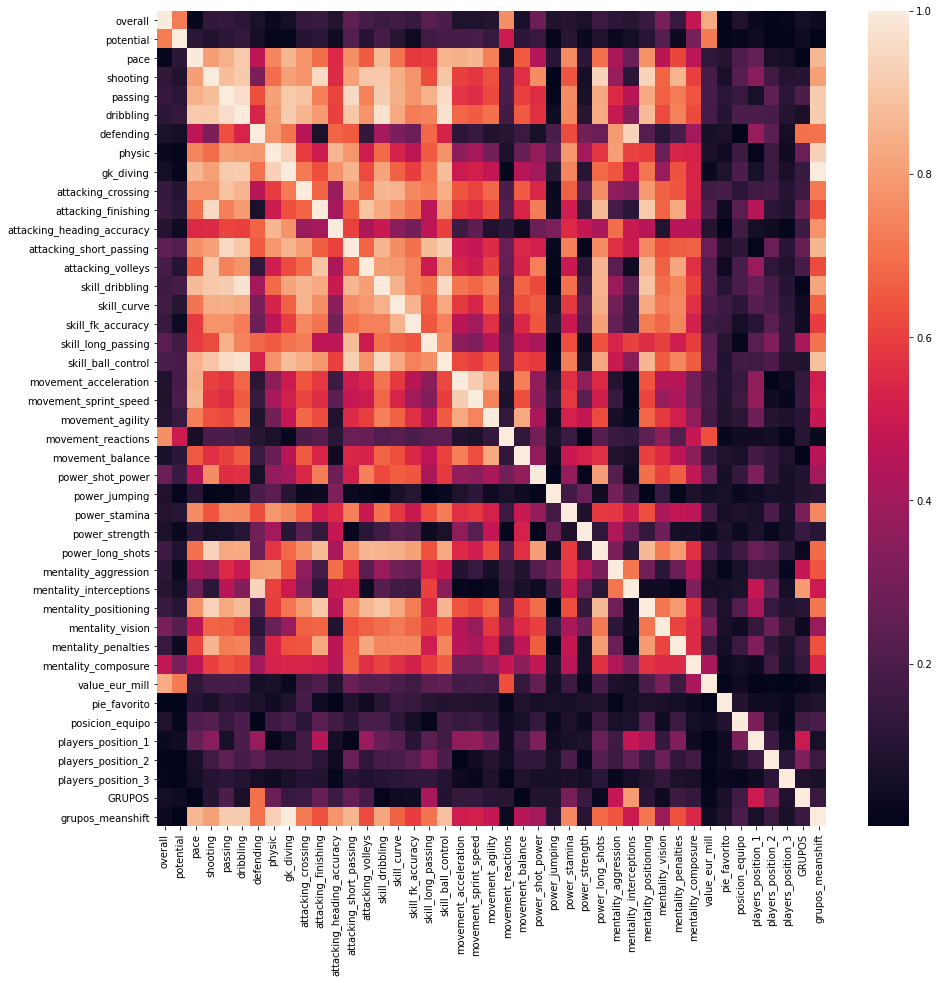

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr().abs(), annot=False,)

## Agrupamieto de características
### Principal components of analysis.

In [ ]:
from sklearn import decomposition


pca_model=decomposition.PCA(n_components=0.95) #la cantidad de componenetes que expliquen el 95% de la varianza 

pca=pca_model.fit_transform(X.iloc[:,0:35]) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca_model.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca_model.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', pca.shape)

proporción de varianza por componente:  [0.63023969 0.15450498 0.0518798  0.04350552 0.01672356 0.01189546
 0.01051942 0.00854034 0.00719603 0.00709796 0.00677317 0.00625961]
proporción de varianza por componente acumulada:  [0.63023969 0.78474468 0.83662448 0.88012999 0.89685356 0.90874902
 0.91926844 0.92780878 0.93500481 0.94210277 0.94887594 0.95513555]
tamaño de los datos:  (5658, 12)


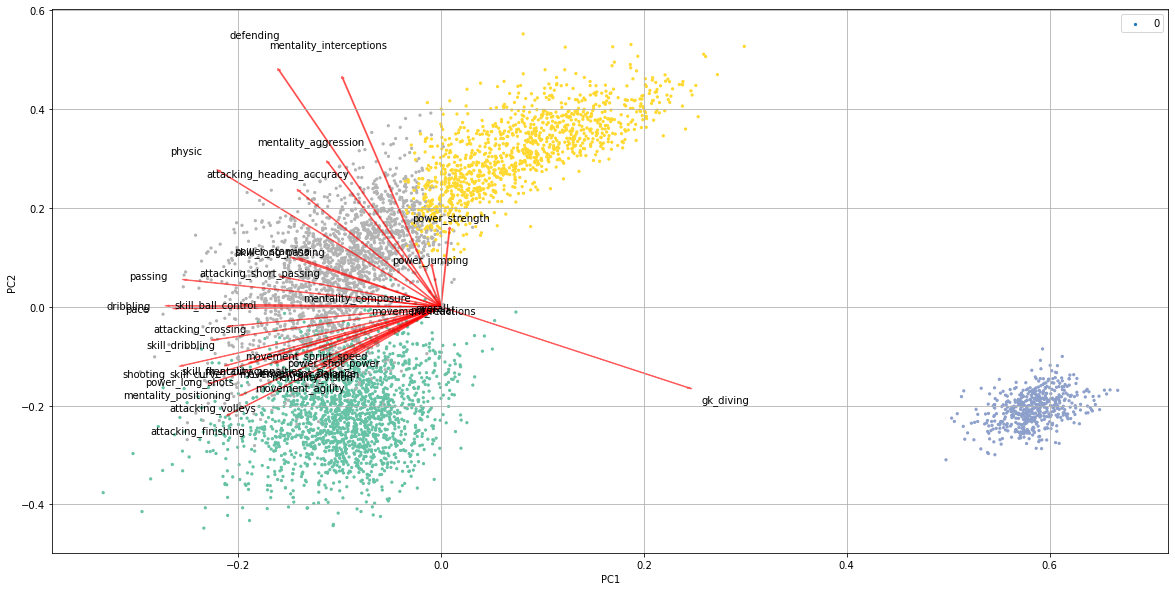

In [ ]:
def myplot(score,coeff,groups,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,10)) 
    plt.scatter(xs * scalex,ys * scaley,s=5, c=groups, cmap='Set2' )
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
 

    plt.legend(groups)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]), X.GRUPOS,list(X.columns))
plt.show()

Vemos en el grafico de arriba un plot de las dos primeras dimensiones resultantes luego de aplicar PCA. Vemos una 'isla' con los arqueros, y vemos que la variable referida a las habilidades del arquero apunta hacia esa isla

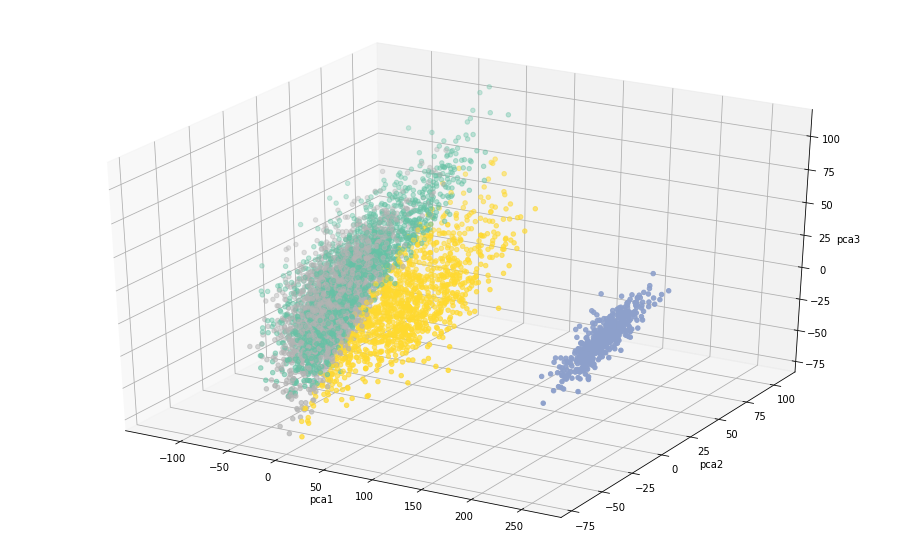

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca[:,0], 
    ys=pca[:,2], 
    zs=pca[:,2],
    c=X.GRUPOS,
    cmap='Set2'
)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

Removemos los arqueros y volvemos a correr PCA

In [ ]:
X_wgk = X[X.GRUPOS != 1]# dataset sin arqueros


In [ ]:
pca_model=decomposition.PCA(n_components=0.95) #la cantidad de componenetes que expliquen el 95% de la varianza 

pca=pca_model.fit_transform(X_wgk.iloc[:,0:35]) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca_model.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca_model.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', pca.shape)

proporción de varianza por componente:  [0.47116637 0.14378988 0.11192376 0.06298386 0.02540616 0.02274516
 0.01846179 0.01519786 0.01452534 0.01386747 0.01311426 0.00990583
 0.00894082 0.00840587 0.00794461 0.00699404]
proporción de varianza por componente acumulada:  [0.47116637 0.61495625 0.72688001 0.78986387 0.81527003 0.83801519
 0.85647698 0.87167484 0.88620018 0.90006765 0.91318191 0.92308774
 0.93202856 0.94043443 0.94837904 0.95537308]
tamaño de los datos:  (5137, 16)


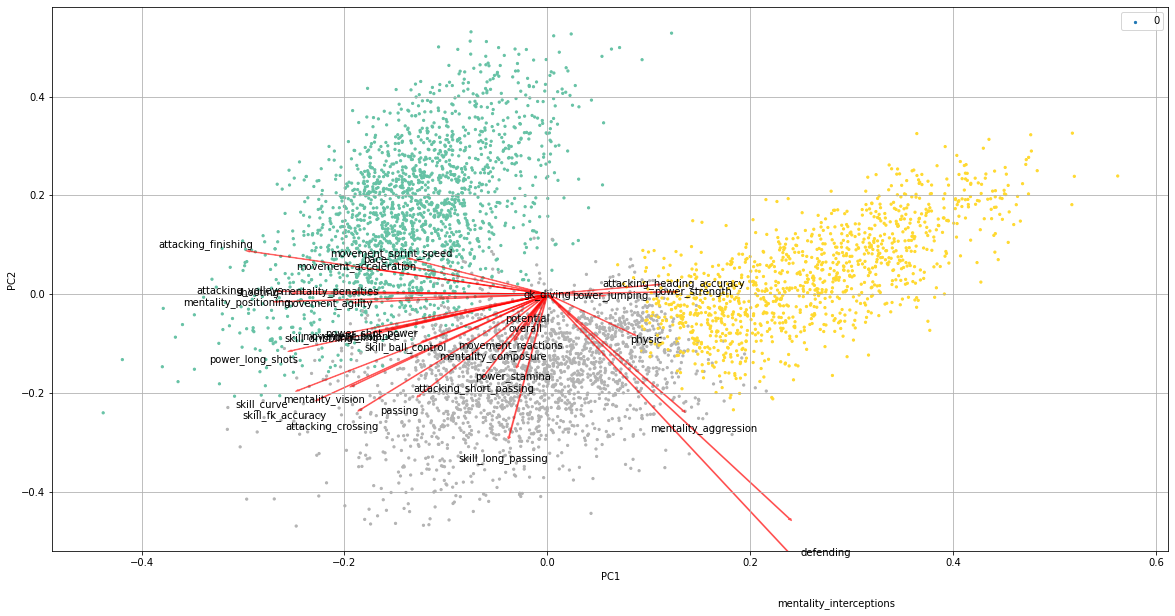

In [ ]:
myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]), X_wgk.GRUPOS,list(X.columns))
plt.show()

Vemos en este caso la conformación de las componentes principales: PC1 se encuentra fuertemente influenciada por habilidades vinculadas al ataque como 'attacking finishing','attacking_voley' 'mentality_penalties', etc., mientras que PC2 se encuentra influenciada por habilidades relacionadas a la defensa: 'defending', 'skill_long_passing'.

Las habilidades representadas por la flecha roja que se encuentran encimadas dan cuanta de una elevada correlación entre sí.

Vemos como se agrupan los datos en función de la posicion que ocupan en el campo , donde cada cluster cuenta con una particular combinación de cada componente principal.

### Clustering con las variables resultantes del PCA

Con las commponenetes principales obtenidas anteriormente, realizamos un clustering utilizando kmeans

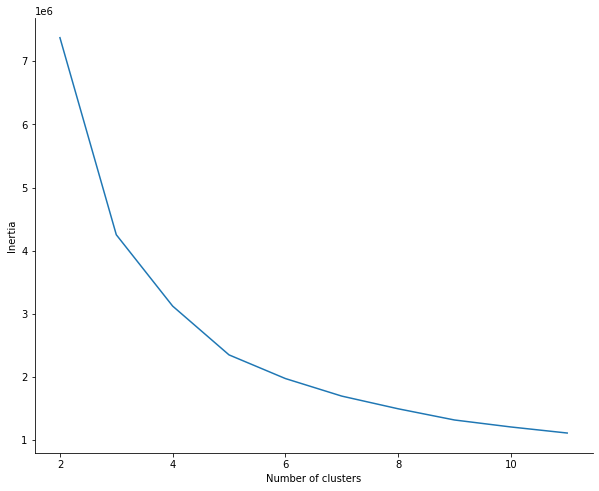

In [ ]:
scores = [KMeans(n_clusters=i+2).fit(pca[:,0:2]).inertia_ for i in range(10)] #Elegimos los 4 primeros componenetes principales

plt.figure(figsize=(10,8))

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")

sns.despine()
plt.show()


El gráfico indica elegir 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca[:,0:2])
kmeans.labels_


array([0, 2, 2, ..., 2, 0, 0], dtype=int32)

In [ ]:
x = pca[:,0:1]
y = pca[:,1:2]

c =  kmeans.labels_
g = kmeans.labels_

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= kmeans.labels_ ))

In [ ]:
p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'


show(p)

Vemos que cada cluster encontrado ocupa mayormente un cuadrante del gráfico, indicado que el grupo 2 (azul) tiene valores de PC1 negativos y PC2 positivos, el grupo 0 (negro) tiene valores negativos de ambos componentes, el grupo 1 (verde) tiene valores positivos y hasta 50 del PC1 y valores negativos de PC2;  y el grupo 3 (rojo) valores positivos de ambos componentes.

## tSNE

In [ ]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.iloc[:,0:35])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5658 samples in 0.036s...
[t-SNE] Computed neighbors for 5658 samples in 1.856s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5658
[t-SNE] Computed conditional probabilities for sample 2000 / 5658
[t-SNE] Computed conditional probabilities for sample 3000 / 5658
[t-SNE] Computed conditional probabilities for sample 4000 / 5658
[t-SNE] Computed conditional probabilities for sample 5000 / 5658
[t-SNE] Computed conditional probabilities for sample 5658 / 5658
[t-SNE] Mean sigma: 12.242960
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.513077
[t-SNE] KL divergence after 1000 iterations: 1.896051
t-SNE done! Time elapsed: 49.58600330352783 seconds


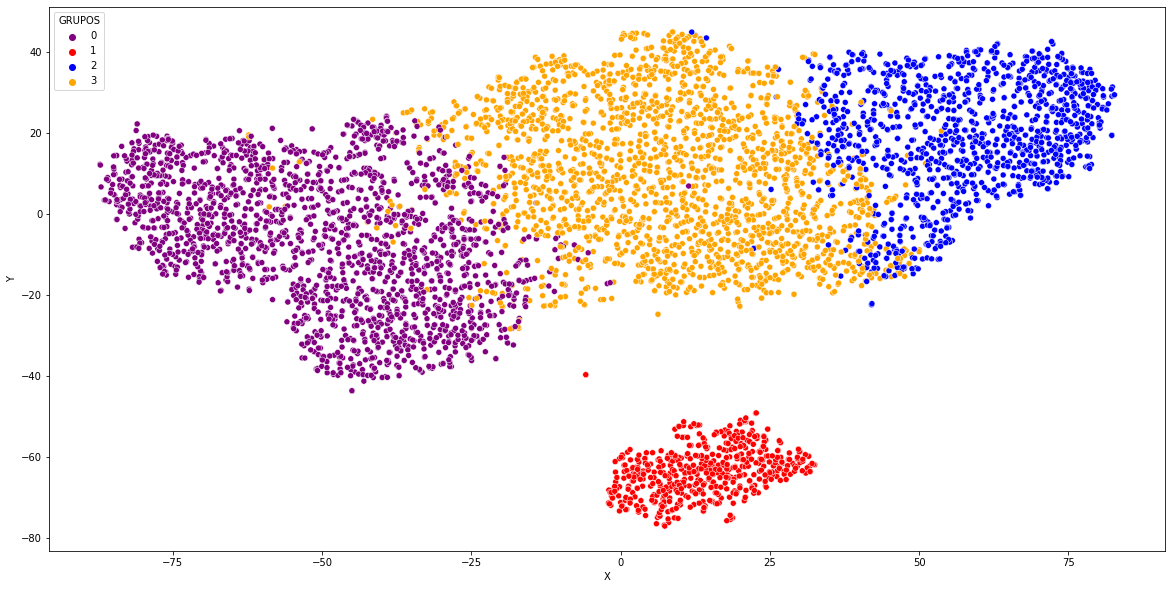

In [ ]:
tsne_df = pd.DataFrame({'X':X_tsne[:,0],
                        'Y':X_tsne[:,1]})
plt.figure(figsize=(20,10))
sns.scatterplot(x="X", y="Y",
              hue=X.GRUPOS,
              palette=['purple','red','blue', 'orange'],
              legend='full',
              data=tsne_df);


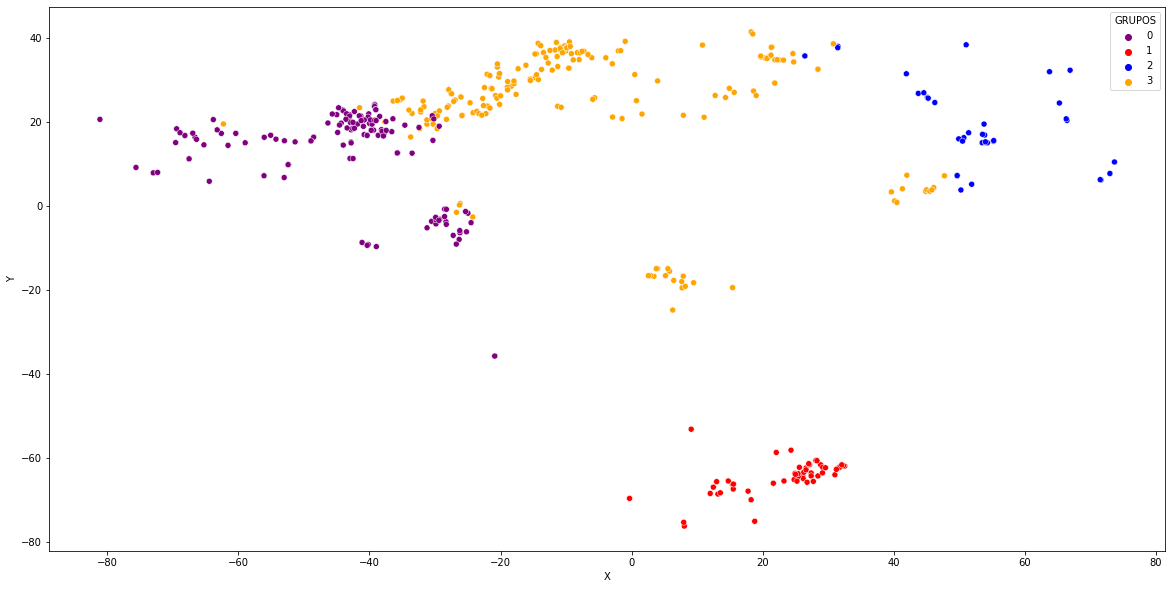

In [ ]:
top_idx = df[df.overall>80].index
idx = [X.index.get_loc(i) for i in top_idx]
plt.figure(figsize=(20,10))
sns.scatterplot(x="X", y="Y",
              hue=X.GRUPOS,
              palette=['purple','red','blue', 'orange'],
              legend='full',
              data=tsne_df.loc[idx]);


Plotamos los jugadores mejor rankeados (overall mayor a 80) y parecieran compartir habilidades similares para las posiciones 2 y 3 (azul y amarillo) mientras que los del grupo 0 (violeta) en su mayoria parecieran estar mas segregados del resto.

####Evaluación

De la exploración de los datos, la mayoría de los registros de jugadores se encuentran concentrados en el ranking de 60 a 80. cuando se realizan agrupaciones con registros cuyo valores de "overall" sean mayores a 70, se mezclan los jugadores en distintas posiciones (excepto arqueros que están bien diferenciados este grupo). 

Cuando se toman los registros de jugadores con "overall" mayor a 85, los atributos distintivos de caga posición se hacen más fuertes y los datos se agrupan en las cuatro (4) posiciones (delanteros, medio-campo, defensores y arqueros)

##### Revisión de registros de grupos con "overall" mayor 80

In [238]:
df_filtardo['posicion_jugador'] = df_jugadores_posicion.posicion.values
df_filtardo['nombre_jugador'] = df_nombres_club.short_name.values

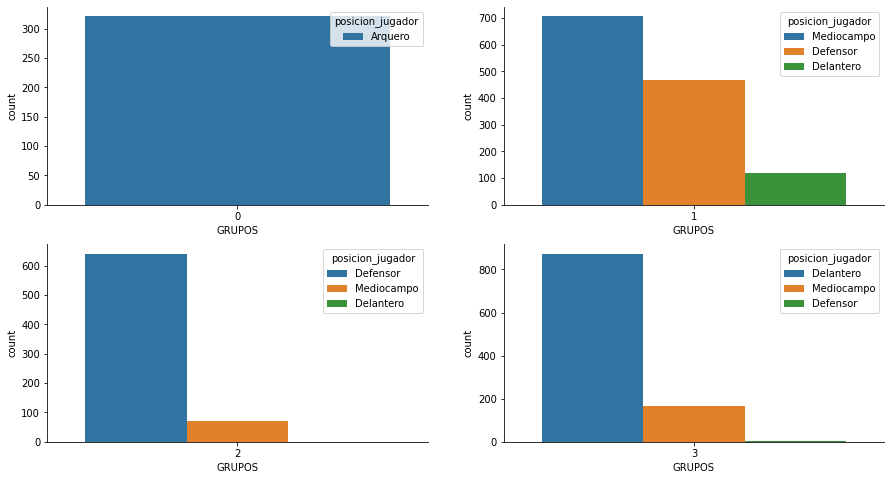

In [247]:
fig, axes = plt.subplots(2,2, figsize=(15,8),sharex=False)

sns.countplot(ax=axes[0,0],  data=df_filtardo.loc[df_filtardo['GRUPOS'] == 0], x='GRUPOS', hue='posicion_jugador')
sns.countplot(ax=axes[0,1],  data=df_filtardo.loc[df_filtardo['GRUPOS'] == 1], x='GRUPOS', hue='posicion_jugador')
sns.countplot(ax=axes[1,0],  data=df_filtardo.loc[df_filtardo['GRUPOS'] == 2], x='GRUPOS', hue='posicion_jugador')
sns.countplot(ax=axes[1,1],  data=df_filtardo.loc[df_filtardo['GRUPOS'] == 3], x='GRUPOS', hue='posicion_jugador')


sns.despine()
plt.show()

In [253]:
df_filtardo.groupby(by=['GRUPOS', 'posicion_jugador'])['posicion_jugador'].count()

GRUPOS  posicion_jugador
0       Arquero             321
1       Defensor            467
        Delantero           118
        Mediocampo          707
2       Defensor            641
        Delantero             1
        Mediocampo           72
3       Defensor              3
        Delantero           874
        Mediocampo          165
Name: posicion_jugador, dtype: int64